¿Qué tan probable es que no se presente a su cita médica?

In [105]:
#Se importan las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from time import strftime

In [81]:
# Cargamos el archivo y lo asignamos a la variable "df"
nsp = pd.read_csv("/home/cris/Proyectos/evaluacion_m3/data/KaggleV2-May-2016.csv")

#Exploramos el DataFrame
nsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [82]:
print(nsp.dtypes)

nsp.sample(5)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
57025,5.457412e+12,5652018,M,2016-05-03T09:34:26Z,2016-05-09T00:00:00Z,61,PRAIA DO SUÁ,0,1,0,1,0,0,No
36870,2.498460e+14,5625870,F,2016-04-27T07:39:14Z,2016-05-06T00:00:00Z,51,RESISTÊNCIA,0,1,0,0,0,1,No
9920,8.539451e+13,5737448,F,2016-05-25T09:36:45Z,2016-05-31T00:00:00Z,57,ROMÃO,0,0,0,0,0,1,Yes
7424,8.221459e+14,5716398,M,2016-05-18T16:50:59Z,2016-05-18T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
41092,3.481262e+13,5726398,F,2016-05-20T13:38:27Z,2016-05-20T00:00:00Z,85,MARIA ORTIZ,0,0,0,0,0,0,No


Se observan algunas inconsistencias en los datos, por ejemplo
PatientID es un tipo de variable Float
Las fechas ("ScheduledDay" y "AppointmentDay") están en "object type"
Se corregirán algunos nombres de las columnas

In [83]:
# Convertiremos la variable "PatientID" de Float a Int
nsp["PatientId"] = nsp["PatientId"].astype("int64")

# Convertiremos ScheduledDay y AppointmentDay a datetime64
nsp["ScheduledDay"] = pd.to_datetime(nsp["ScheduledDay"]).dt.date.astype("datetime64[ns]")
nsp["AppointmentDay"] = pd.to_datetime(nsp["AppointmentDay"]).dt.date.astype("datetime64[ns]")

# Correción de nombres de columnas
nsp = nsp.rename(columns={"Handcap":"Handicap", "SMS_received":"SMSReceived", "No-show":"NoShow"})

In [93]:
# Comprobaremos los cambios realizados
nsp.info()

nsp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Age             110526 non-null  int64         
 4   Neighbourhood   110526 non-null  object        
 5   Scholarship     110526 non-null  object        
 6   Hipertension    110526 non-null  object        
 7   Diabetes        110526 non-null  object        
 8   Alcoholism      110526 non-null  object        
 9   Handicap        110526 non-null  object        
 10  SMSReceived     110526 non-null  object        
 11  NoShow          110526 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 11.0+ MB


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [85]:
nsp.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

En base a la información del DataFrame, podemos ver que existen 14 columnas en total.
Nuestra variable dependiente es "NoShow" y las demás columnas son nuestras variales independientes

Limpiaremos el DF de "PatientID" y "AppointmentID" que no nos aportan información útil para el análsis.

In [86]:
# Haremos drop a variables "PatientID" y "AppointmentID" puesto que son sólo números que se les asignó a cada usuario y cita

nsp.drop(["PatientId", "AppointmentID"], axis=1, inplace=True)      #Ocupamos inplace=True para modificar el DF original

In [87]:
# Se chequean datos faltantes en cada columna
nulos = nsp.isnull().sum()
nulos = nulos[nulos > 0]
print("\nValores nulos, (si es que los hay)")
print(nulos)

# Se chequean valores unicos
valores_unicos = nsp.nunique().sort_values(ascending=False)
print("\nValores unicos por columna:")
print(valores_unicos)


Valores nulos, (si es que los hay)
Series([], dtype: int64)

Valores unicos por columna:
ScheduledDay      111
Age               104
Neighbourhood      81
AppointmentDay     27
Handicap            5
Gender              2
Hipertension        2
Scholarship         2
Diabetes            2
Alcoholism          2
SMSReceived         2
NoShow              2
dtype: int64


In [88]:
# Se exploran los valores únicos de cada columna

print("Valores únicos en 'Gender' ==> {}".format(nsp.Gender.unique()))
print("Valores únicos en 'Handicap' ==> {}".format(nsp.Handicap.unique()))
print("Valores únicos en 'Scholarship' ==> {}".format(nsp.Scholarship.unique()))
print("Valores únicos en 'Hipertension' ==> {}".format(nsp.Hipertension.unique()))
print("Valores únicos en 'Diabetes' ==> {}".format(nsp.Diabetes.unique()))
print("Valores únicos en 'Alcoholism' ==> {}".format(nsp.Alcoholism.unique()))
print("Valores únicos en 'SMSReceived' ==> {}".format(nsp.SMSReceived.unique()))
print("Valores únicos en 'NoShow' ==> {}".format(nsp.NoShow.unique()))

Valores únicos en 'Gender' ==> ['F' 'M']
Valores únicos en 'Handicap' ==> [0 1 2 3 4]
Valores únicos en 'Scholarship' ==> [0 1]
Valores únicos en 'Hipertension' ==> [1 0]
Valores únicos en 'Diabetes' ==> [0 1]
Valores únicos en 'Alcoholism' ==> [0 1]
Valores únicos en 'SMSReceived' ==> [0 1]
Valores únicos en 'NoShow' ==> ['No' 'Yes']


Vemos que 'gender' tiene valores de 'F' y 'M',
'handicap' puede tomar 5 valores,
el resto de variables pueden tomar valores de 1s y 0s que representan si tiene o no la enfermedad o si recibió el mensaje o no, es decir son variables categoricas y no numéricas. Motivo por el cual cambiaremos a object con el fin de evitar aplicar operaciones matemáticas o que se realicen cálculos con estos valores.

In [89]:
nsp["Scholarship"] = nsp["Scholarship"].astype("object")
nsp["Hipertension"] = nsp["Hipertension"].astype("object")
nsp["Diabetes"] = nsp["Diabetes"].astype("object")
nsp["Alcoholism"] = nsp["Alcoholism"].astype("object")
nsp["Handicap"] = nsp["Handicap"].astype("object")
nsp["SMSReceived"] = nsp["SMSReceived"].astype("object")

# Evaluamos el cambio realizado
nsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  object        
 6   Hipertension    110527 non-null  object        
 7   Diabetes        110527 non-null  object        
 8   Alcoholism      110527 non-null  object        
 9   Handicap        110527 non-null  object        
 10  SMSReceived     110527 non-null  object        
 11  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 10.1+ MB


In [90]:
# Revisaremos los valores de la columna "Age"
print("Valores únicos en 'Edad': {}".format(np.sort(nsp.Age.unique())))

Valores únicos en 'Edad': [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


Observamos que hay una edad -1, lo cual no tiene sentido, por lo que eliminaremos.

In [91]:
# Veamos la cantidad de personas con edad -1 y 0
print("Usuarios con Edad -1: {}".format(nsp[nsp.Age == -1].shape[0]))
print("Usuarios con Edad 0: {}".format(nsp[nsp.Age == 0].shape[0]))

# Sólo hay un paciente con edad -1
nsp = nsp[nsp.Age >= 0]

Usuarios con Edad -1: 1
Usuarios con Edad 0: 3539


In [92]:
# Revisemos si aquellos con edad 0, poseen alguna enfermedad crónica (HTA, DM2, Alcoholismo),
# asumiendo que son bebés y que no poseen estas enfermedades
# Si se presenta vacío, se confirma que son bebés y no errores.

nsp[(nsp.Age <= 0) & ((nsp.Hipertension.astype(int) == 1) | (nsp.Diabetes.astype(int) == 1) | (nsp.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


In [96]:
# Veamos la cantidad de valores únicos en "ScheduledDay"
print("Valores únicos de fechas: {}".format(np.sort(nsp.ScheduledDay.dt.strftime("%Y-%m-%d").unique())))

Valores únicos de fechas: ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '2016-04-1

De la linea de codigo superior podemos ver que las fechas están entre Diciembre 2015 y Junio 2016, es decir 7 meses aprox.

In [ ]:
# Veamos los valores únicos en "AppointmentDay"
print("Valores únicos de AppointmentDay: {}".format(np.sort(nsp.AppointmentDay.dt.strftime("%Y-%m-%d").unique())))

Valores únicos de AppointmentDay: ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


Aquí también podemos ver que las fechas están entre Abril 2016 y Junio 2016, lo que es un mes en contraste con lo anterior que son 7 meses.

In [103]:
# Veamos los valores únicos en "Neighbourhood"
print("Valores únicos en Neighbourhood: {}".format(np.sort(nsp.Neighbourhood.unique())))

print("\nCantidad total de 'Neighbourhood': {}".format(nsp.Neighbourhood.unique().size))

Valores únicos en Neighbourhood: ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚ

Para realizar un análisis de los 'NoShow' debemos extraer el día de la semana (DDS)

In [169]:
# Día De la Semana
nsp["ScheduledDay_DDS"] = nsp["ScheduledDay"].dt.day_name()

nsp["AppointmentDay_DDS"] = nsp["AppointmentDay"].dt.day_name()

Idealmente, el día de la cita debería ser igual o posterior al día programado.
A continuación, verificaremos si hay algún registro con inconsistencia.
Si el día programado es posterior al día de la cita, lo consideraremos un error y lo corregiremos

In [162]:
nsp["AppointmentDay"] = np.where(
    (nsp["AppointmentDay"] - nsp["ScheduledDay"]).dt.days < 0,
    nsp["ScheduledDay"],
    nsp["AppointmentDay"]
)

nsp["dias_entre_cita_y_agenda"] = (nsp["AppointmentDay"] - nsp["ScheduledDay"]).dt.days
print("Hay [{}] registros con tiempo de espera negativo.".format((dias_entre_cita_y_agenda < 0).sum()))

Hay [0] registros con tiempo de espera negativo.


In [159]:
nsp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Gender                    110526 non-null  object        
 1   ScheduledDay              110526 non-null  datetime64[ns]
 2   AppointmentDay            110526 non-null  datetime64[ns]
 3   Age                       110526 non-null  int64         
 4   Neighbourhood             110526 non-null  object        
 5   Scholarship               110526 non-null  object        
 6   Hipertension              110526 non-null  object        
 7   Diabetes                  110526 non-null  object        
 8   Alcoholism                110526 non-null  object        
 9   Handicap                  110526 non-null  object        
 10  SMSReceived               110526 non-null  object        
 11  NoShow                    110526 non-null  object        
 12  Schedul

In [170]:
nsp.sample(4)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DDS,AppointmentDay_DDS,dias_entre_cita_y_agenda
28229,M,2016-04-14,2016-05-24,27,REPÚBLICA,0,0,0,0,0,1,No,Thursday,Tuesday,40
68628,M,2016-05-02,2016-05-10,11,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,Monday,Tuesday,8
58182,F,2016-04-20,2016-05-04,47,MATA DA PRAIA,0,0,0,0,0,1,Yes,Wednesday,Wednesday,14
64303,M,2016-02-24,2016-05-24,57,SÃO PEDRO,0,1,0,1,0,1,No,Wednesday,Tuesday,90


In [130]:
print("Cantidad de usuarios que asistieron y no asistieron a la cita:\n")
print(nsp.NoShow.value_counts())

print("\nPorcentaje de asistencias y no asistencias:\n")
print(nsp.NoShow.value_counts(normalize=True) * 100)

Cantidad de usuarios que asistieron y no asistieron a la cita:

NoShow
No     88207
Yes    22319
Name: count, dtype: int64

Porcentaje de asistencias y no asistencias:

NoShow
No     79.806561
Yes    20.193439
Name: proportion, dtype: float64


Visualización

/tmp/ipykernel_68923/512709200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=nsp.NoShow, data=nsp, palette="Set2")


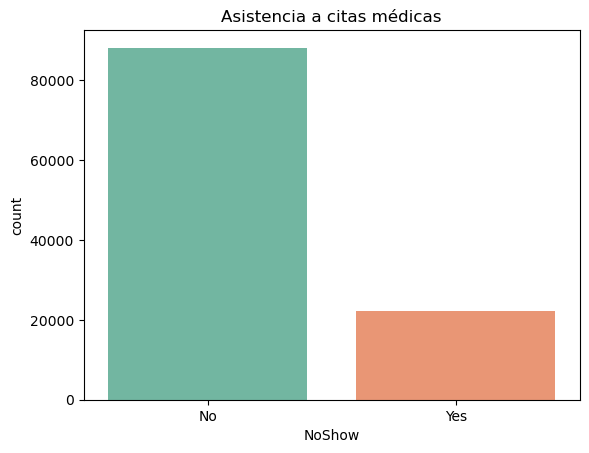

In [133]:
ax = sns.countplot(x=nsp.NoShow, data=nsp, palette="Set2")
ax.set_title("Asistencia a citas médicas")
plt.show()

/tmp/ipykernel_68923/3416984381.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


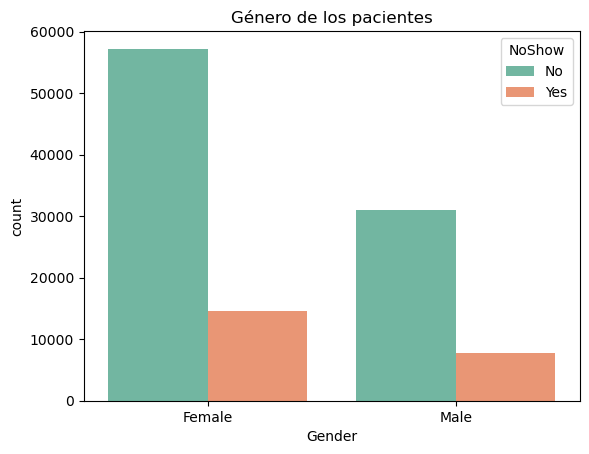

In [138]:
ax = sns.countplot(x=nsp.Gender, hue=nsp.NoShow, data=nsp, palette="Set2")
ax.set_title("Género de los pacientes")
x_ticks_labels=["Female", "Male"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

Podemos observar que las mujeres consultan más que los hombres.
Sin embargo, la proporcion por género es similar en hombres y mujeres, por lo que el género no es determinante en si un paciente falta a su cita o no.

<Axes: xlabel='Age'>

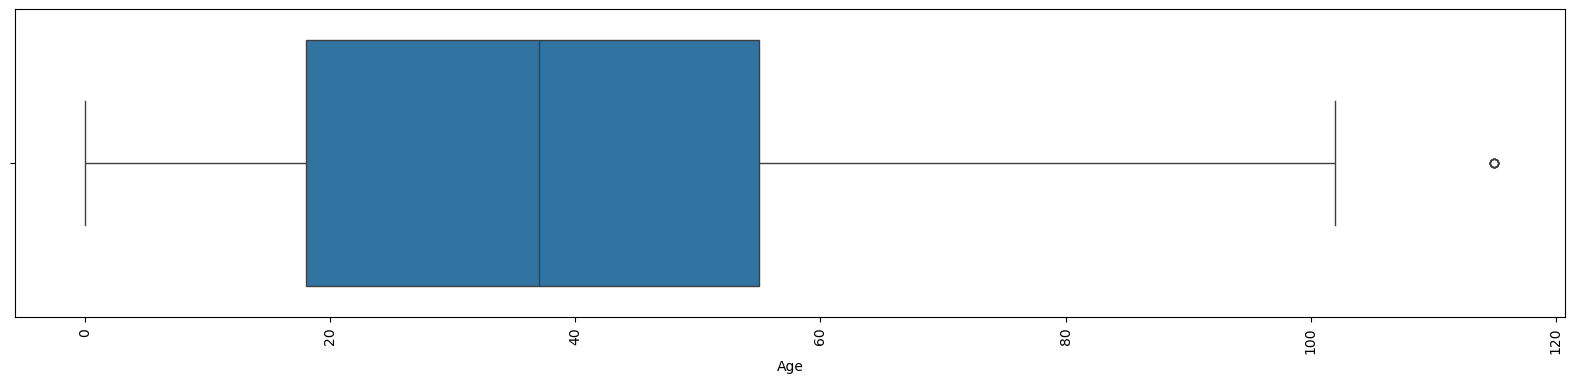

In [140]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(x=nsp.Age)

Podemos ver que la media de edad está cerca de los 40 años.

Veamos la cantidad de pacientes por por Edad

/tmp/ipykernel_68923/2667677761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=nsp.Age, palette="rainbow")


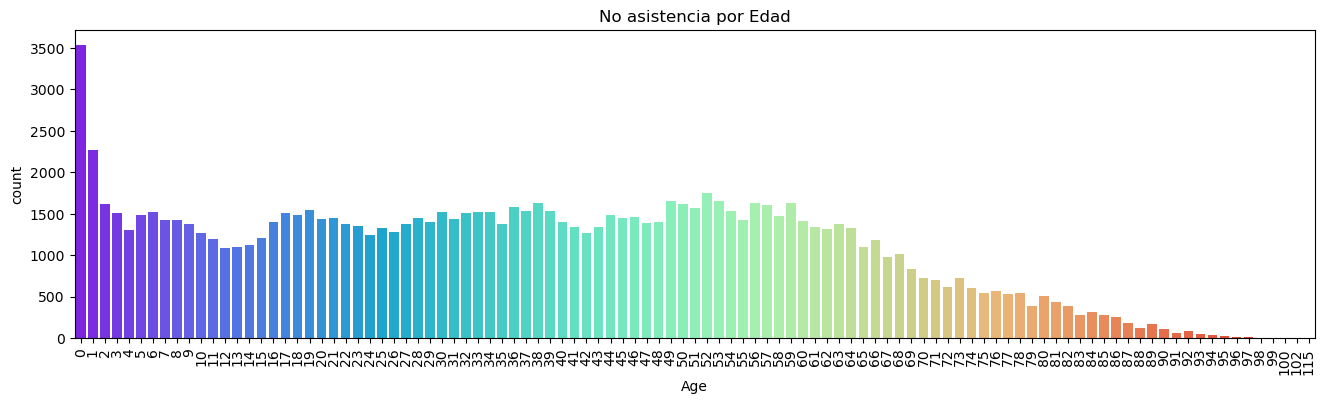

In [179]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=nsp.Age, palette="rainbow")
ax.set_title("No asistencia por Edad")
plt.show()

Apreciaciones:
1. Los niños entre 0 y 1 años faltan más a sus citas
2. Desde los 60 años faltan cada vez menos

A continuación veamos un gráfico de Asistencia/No Asistencia

<function matplotlib.pyplot.show(close=None, block=None)>

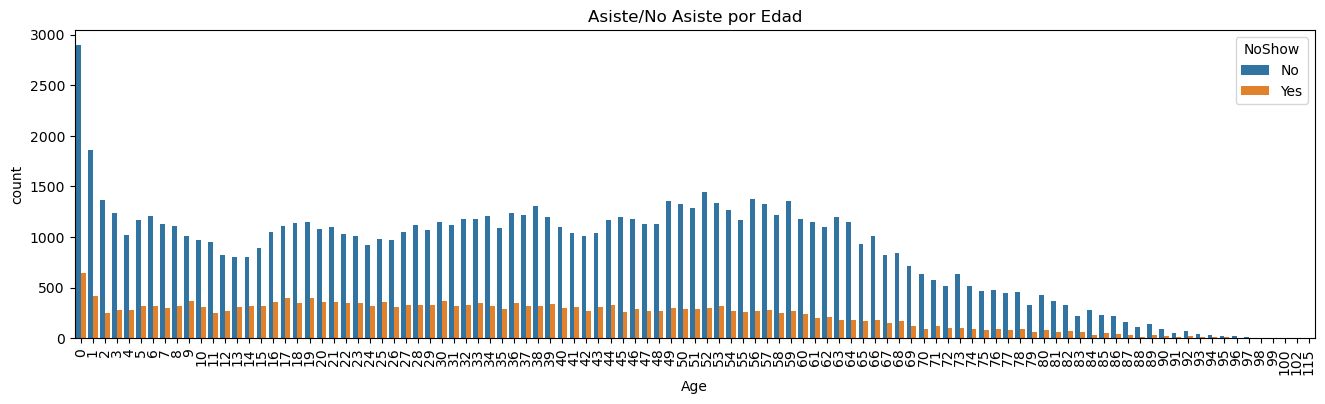

In [149]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=nsp.Age, hue=nsp.NoShow)
ax.set_title("Asiste/No Asiste por Edad")
plt.show

Se observa una curva relativamente similar a la NoAsistencia

In [ ]:
nsp_age_ratio = nsp[nsp.NoShow == 'No'].groupby(['Age']).size()/nsp.groupby(['Age']).size()

/tmp/ipykernel_68923/808582692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=nsp_age_ratio.index, y=nsp_age_ratio, palette="rainbow")


<function matplotlib.pyplot.show(close=None, block=None)>

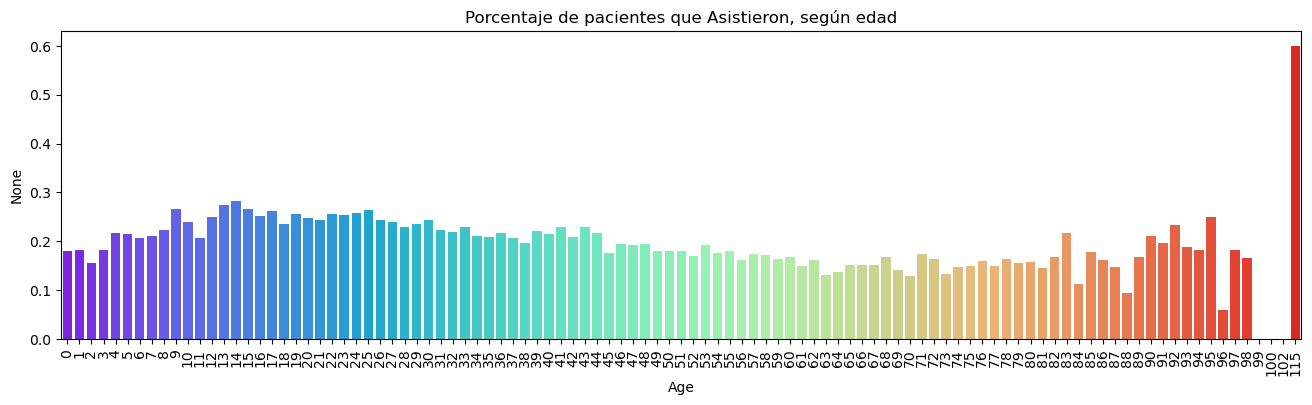

In [211]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=nsp_age_ratio.index, y=nsp_age_ratio, palette="rainbow")
ax.set_title("Porcentaje de pacientes que Asistieron, según edad")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

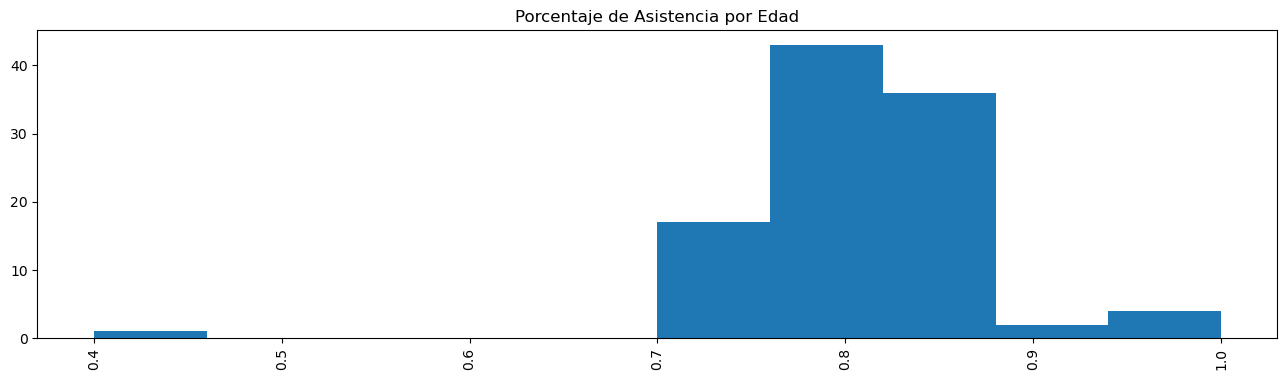

In [154]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(nsp_age_ratio)
plt.title("Porcentaje de Asistencia por Edad")
plt.show

Aproximadamente un 80% de los pacientes asistieron a su cita

Revisemos los pacientes según su Vecindario:

/tmp/ipykernel_68923/76652418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=np.sort(nsp.Neighbourhood), palette="Set2")


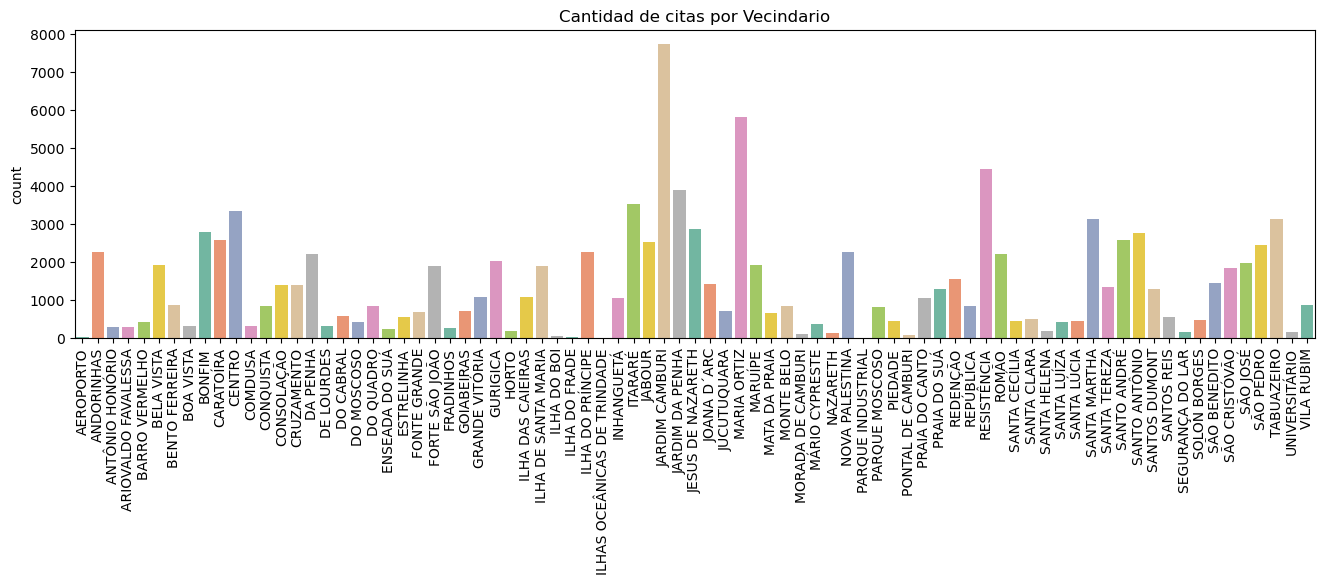

In [182]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(nsp.Neighbourhood), palette="Set2")
ax.set_title("Cantidad de citas por Vecindario")
plt.show()

Algunos vecindarios agendan muchas citas en contraste con otros

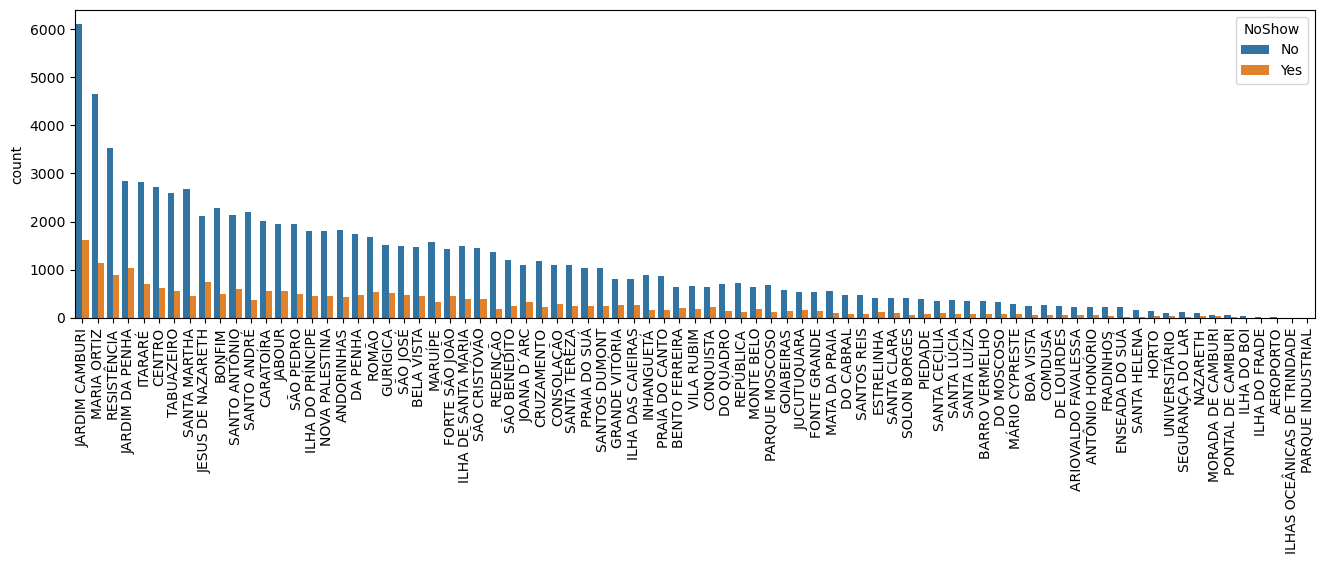

In [190]:
#Asistencia y No Asistencia por Vecindario

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(nsp.Neighbourhood), hue=nsp.NoShow, order=nsp.Neighbourhood.value_counts().index)
plt.show()

La cantidad de Asistencia y No Asistencia por vecindario es similar entre ellos, veamos con porcentajes

In [212]:
nsp_nbhd_ratio = (nsp.NoShow == "No").groupby(nsp.Neighbourhood).mean()

/tmp/ipykernel_68923/1917515667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=nsp_nbhd_ratio.index, y=nsp_nbhd_ratio, palette="rainbow")


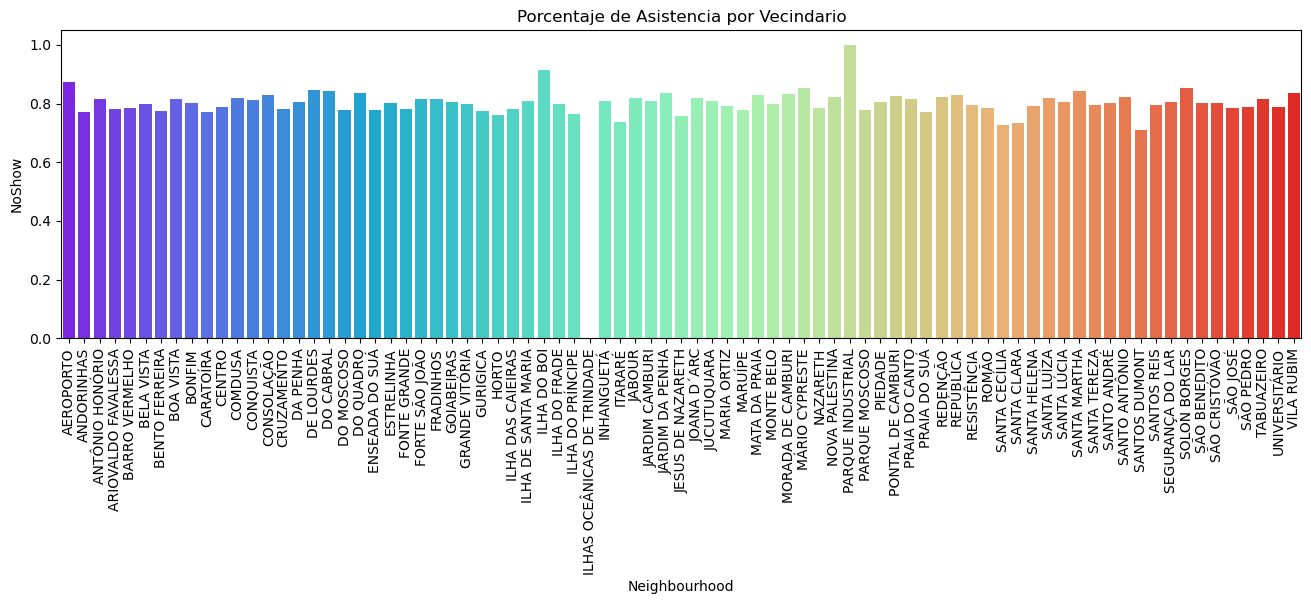

In [213]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=nsp_nbhd_ratio.index, y=nsp_nbhd_ratio, palette="rainbow")
ax.set_title("Porcentaje de Asistencia por Vecindario")
plt.show()

La asistencia también es cercana al 80% como lo vimos anteriormente por Edad

Revisemos la asistencia según el nivel educacional

/tmp/ipykernel_68923/3851086933.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels("Asistencia/No Asistencia por Escolaridad")
/tmp/ipykernel_68923/3851086933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


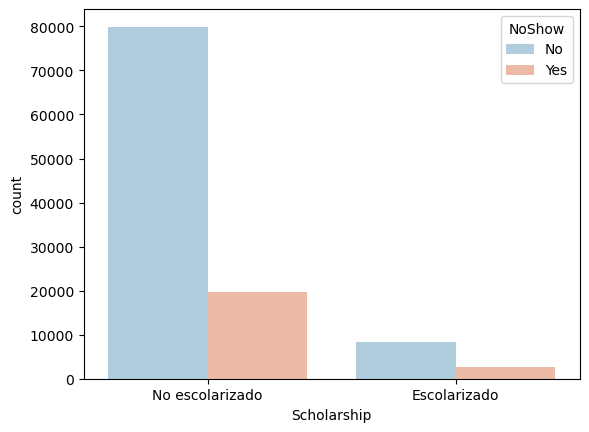

In [219]:
ax = sns.countplot(
    x=nsp.Scholarship,
    hue=nsp.NoShow,
    data=nsp,
    palette="RdBu_r"
)

ax.set_xticklabels("Asistencia/No Asistencia por Escolaridad")
x_ticks_labels=["No escolarizado", "Escolarizado"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

/tmp/ipykernel_68923/536230367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_68923/536230367.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Escolarizado", "Escolarizado"])


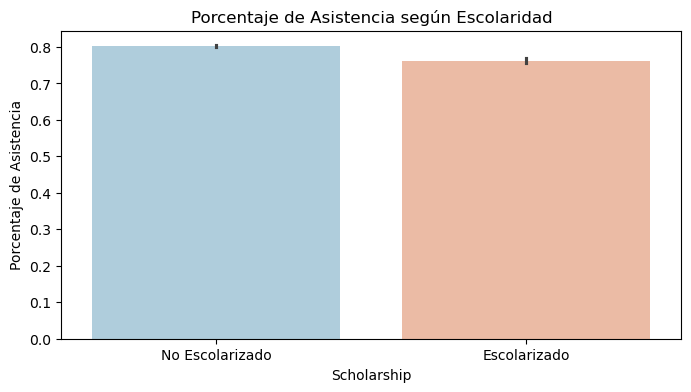

In [223]:
# Revisemos segun el porcentaje

plt.figure(figsize=(8,4))
ax = sns.barplot(
    data=nsp,
    x="Scholarship",
    y=(nsp.NoShow == "No"),
    estimator=np.mean,
    palette="RdBu_r"
)

ax.set_title("Porcentaje de Asistencia según Escolaridad")
ax.set_xticklabels(["No Escolarizado", "Escolarizado"])
ax.set_ylabel("Porcentaje de Asistencia")
plt.show()

Existen unos 100.000 pacientes No escolarizados y un 80% de ellos asisten a su cita.
Por otra parte, los escolarizados son menos y aproximadamente un 75% asistió a su cita.

Revisemos la Asistencia según las patologías Hipertension, Diabetes, Alcoholismo, SMSRecibido

/tmp/ipykernel_68923/910418872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


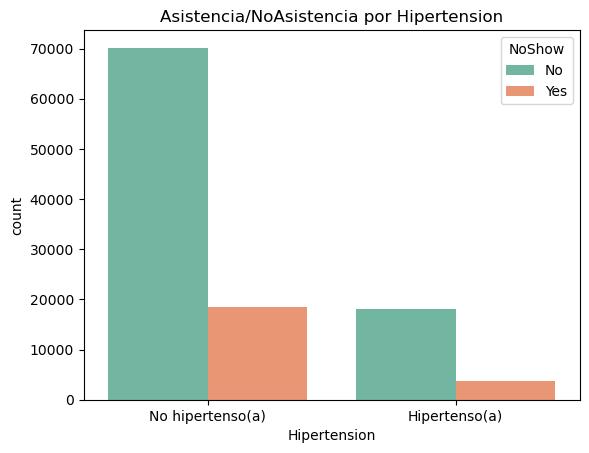

/tmp/ipykernel_68923/910418872.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_68923/910418872.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Hipertenso(a)", "Hipertenso(a)"])


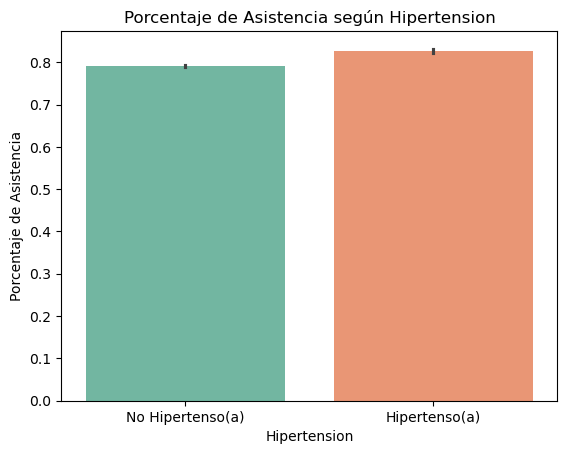

In [ ]:
# Hipertension

ax = sns.countplot(
    x=nsp.Hipertension,
    hue=nsp.NoShow,
    data=nsp,
    palette="Set2"
)
ax.set_title("Asistencia/NoAsistencia por Hipertension")
x_ticks_labels=["No hipertenso(a)", "Hipertenso(a)"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

# Porcentaje de Asistencia según Hipertension
ax = sns.barplot(
    x=nsp.Hipertension,
    y=(nsp.NoShow == "No"),
    data=nsp,
    estimator=np.mean,
    palette="Set2"
)
ax.set_title("Porcentaje de Asistencia según Hipertension")
ax.set_xticklabels(["No Hipertenso(a)", "Hipertenso(a)"])
ax.set_ylabel("Porcentaje de Asistencia")
plt.show()

Podemos ver que 90.000 pacientes aprox No tienen Hipertensión y de ellos el 75% asistió a su cita.
Y 22.000 pacientes tienen Hipertensión y un 85% de ellos asistió a su cita.

/tmp/ipykernel_68923/491747371.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


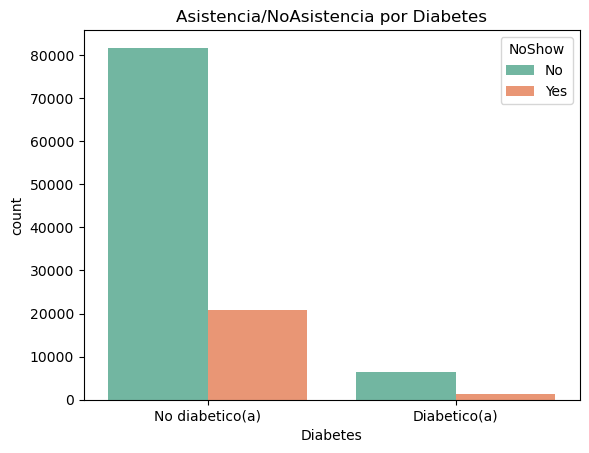

/tmp/ipykernel_68923/491747371.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_68923/491747371.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No diabetico(a)", "Diabetico(a)"])


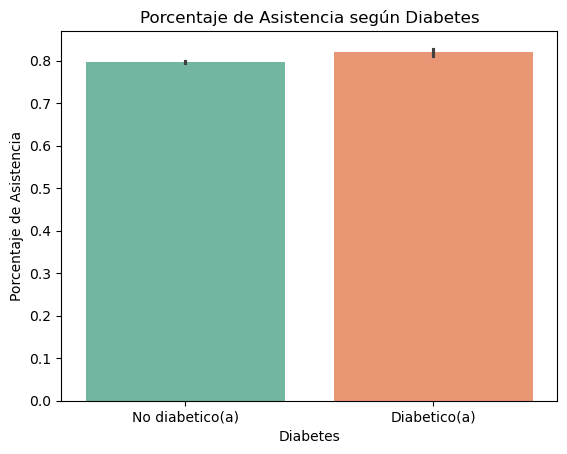

In [228]:
# Diabetes

ax = sns.countplot(
    x=nsp.Diabetes,
    hue=nsp.NoShow,
    data=nsp,
    palette="Set2"
)
ax.set_title("Asistencia/NoAsistencia por Diabetes")
x_ticks_labels=["No diabetico(a)", "Diabetico(a)"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

# Porcentaje de Asistencia según Hipertension
ax = sns.barplot(
    x=nsp.Diabetes,
    y=(nsp.NoShow == "No"),
    data=nsp,
    estimator=np.mean,
    palette="Set2"
)
ax.set_title("Porcentaje de Asistencia según Diabetes")
ax.set_xticklabels(["No diabetico(a)", "Diabetico(a)"])
ax.set_ylabel("Porcentaje de Asistencia")
plt.show()

Del total de unos 100.000 pacientes No Diabeticos, un 80% asistió a su cita.

De los pacientes con Diabetes, que son 8000 aprox, un 84% asistió a su cita.

/tmp/ipykernel_68923/2057625110.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


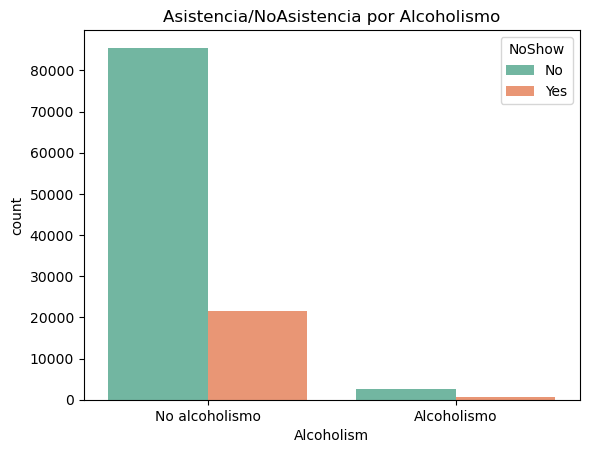

/tmp/ipykernel_68923/2057625110.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_68923/2057625110.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No alcoholismo", "Alcoholismo"])


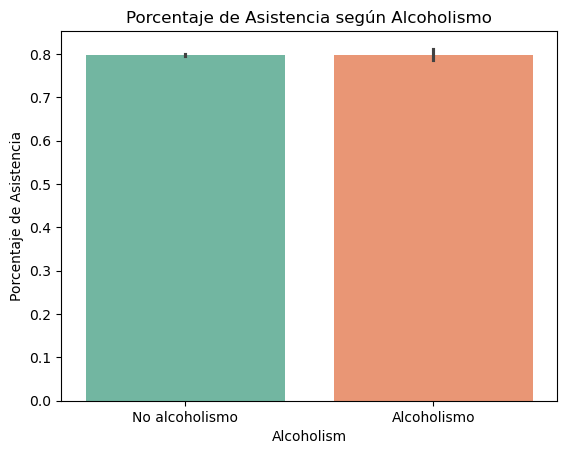

In [231]:
# Alcoholismo

ax = sns.countplot(
    x=nsp.Alcoholism,
    hue=nsp.NoShow,
    data=nsp,
    palette="Set2"
)
ax.set_title("Asistencia/NoAsistencia por Alcoholismo")
x_ticks_labels=["No alcoholismo", "Alcoholismo"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

# Porcentaje de Asistencia según Hipertension
ax = sns.barplot(
    x=nsp.Alcoholism,
    y=(nsp.NoShow == "No"),
    data=nsp,
    estimator=np.mean,
    palette="Set2"
)
ax.set_title("Porcentaje de Asistencia según Alcoholismo")
ax.set_xticklabels(["No alcoholismo", "Alcoholismo"])
ax.set_ylabel("Porcentaje de Asistencia")
plt.show()

De los pacientes sin alcoholismo, que son 104.000 aprox, un 80% asistió a su cita.

Al igual que los pacientes con alcoholismo, un 80% asistió.

Los porcentajes de asistencia son similares, por lo que el alcoholismo no nos ayuda a determinar si un paciente asistirá a su cita o no.

/tmp/ipykernel_68923/2025763381.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


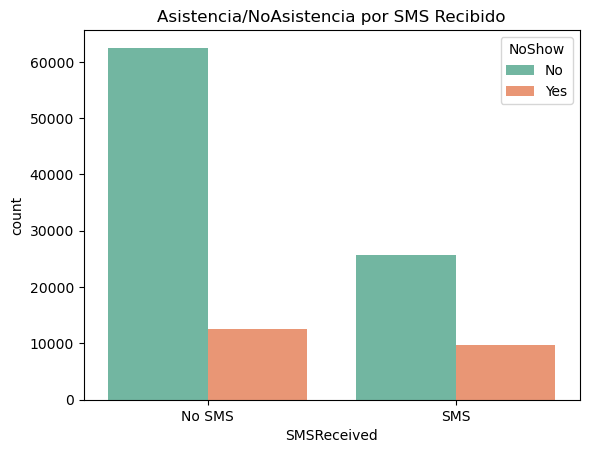

/tmp/ipykernel_68923/2025763381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_68923/2025763381.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


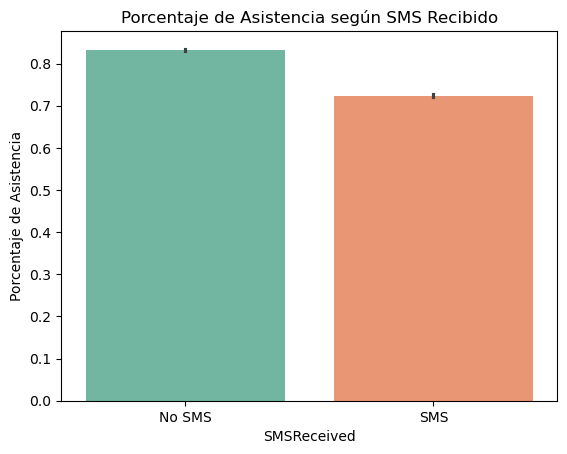

In [234]:
# SMS Recibido

ax = sns.countplot(
    x=nsp.SMSReceived,
    hue=nsp.NoShow,
    data=nsp,
    palette="Set2"
)
ax.set_title("Asistencia/NoAsistencia por SMS Recibido")
x_ticks_labels=["No SMS", "SMS"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

# Porcentaje de Asistencia según SMS Recibido
ax = sns.barplot(
    x=nsp.SMSReceived,
    y=(nsp.NoShow == "No"),
    data=nsp,
    estimator=np.mean,
    palette="Set2"
)
ax.set_title("Porcentaje de Asistencia según SMS Recibido")
x_ticks_labels = ["No SMS", "SMS"]
ax.set_xticklabels(x_ticks_labels)
ax.set_ylabel("Porcentaje de Asistencia")
plt.show()

Podemos ver que 75.000 pacientes no recibieron SMS y un 85% asistió a su cita.
Unos 35.000 pacientes recibieron SMS y asistió un 73%.
Esto parece contrario a lo habitual, sin embargo como existe una diferencia considerable nos ayudará a determinar si un paciente asistirá o no a su cita.

/tmp/ipykernel_68923/3789304003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


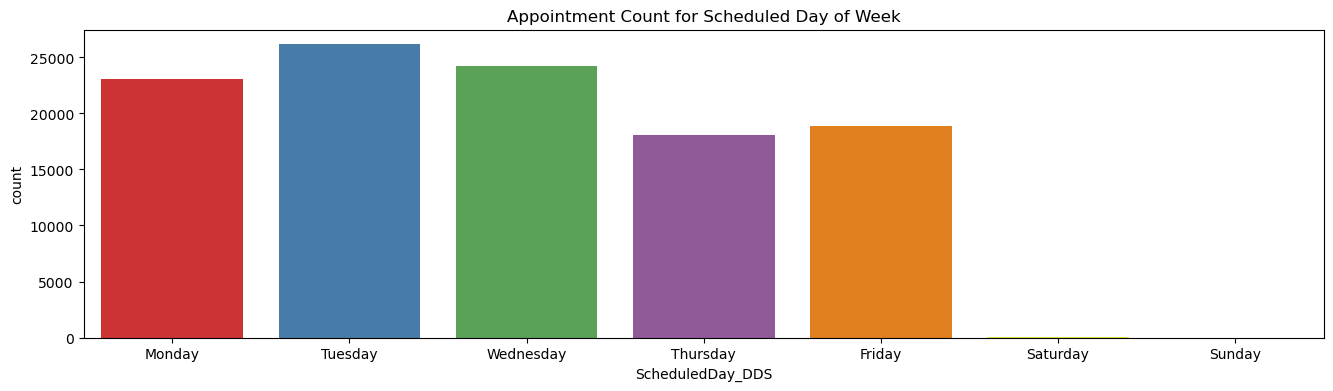

In [236]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(16,4))
ax = sns.countplot(
    x=nsp.ScheduledDay_DDS,
    order=week_key,
    palette="Set1"
)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

/tmp/ipykernel_68923/2302416427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


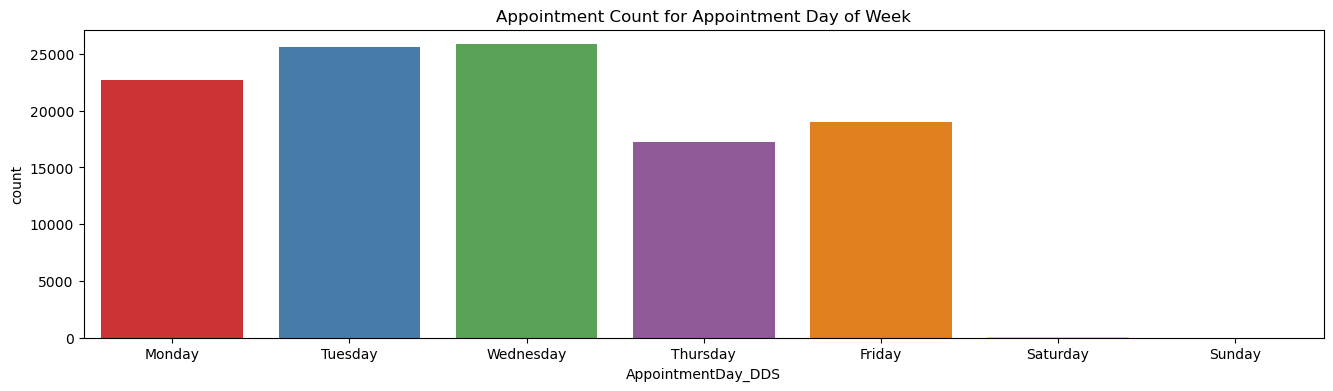

In [235]:
plt.figure(figsize=(16,4))
ax = sns.countplot(
    x=nsp.AppointmentDay_DDS,
    order=week_key,
    palette="Set1"
)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

Observamos que hay un patrón similar en ambos gráficos. También no se visualizan citas en dias de fin de semana.

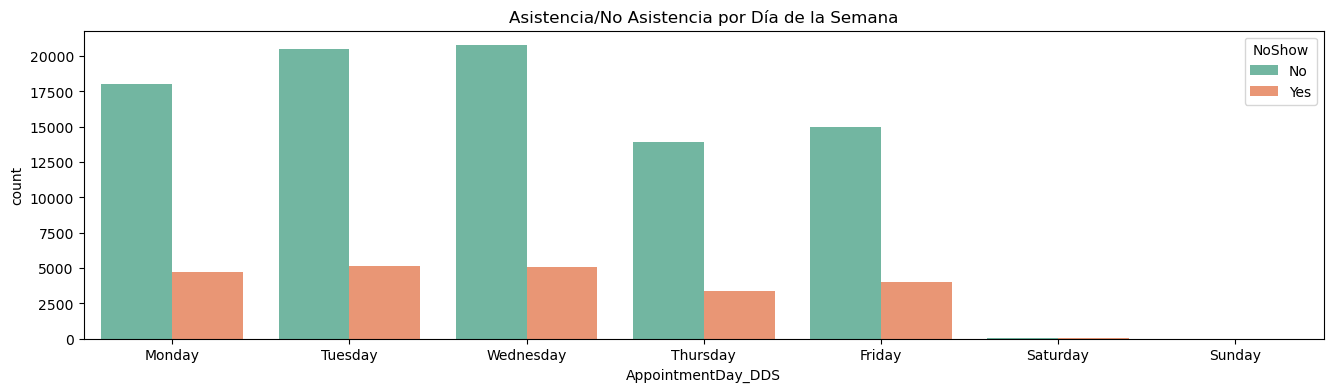

/tmp/ipykernel_68923/2822791899.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


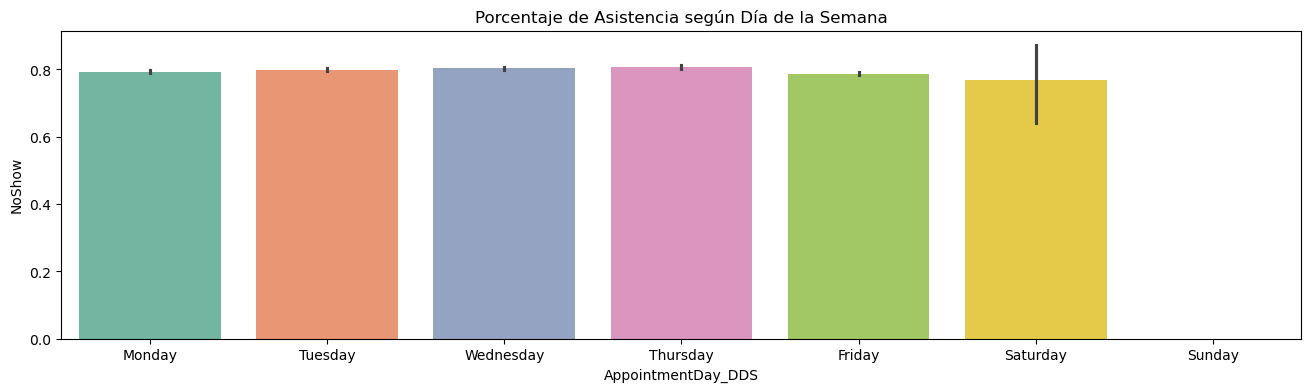

In [245]:
plt.figure(figsize=(16,4))
ax = sns.countplot(
    x=nsp.AppointmentDay_DDS,
    hue=nsp.NoShow,
    order=week_key,
    palette="Set2"
)
ax.set_title("Asistencia/No Asistencia por Día de la Semana")
plt.show()

# Porcentaje de Asistencia según Día de la Semana
plt.figure(figsize=(16,4))
ax = sns.barplot(
    x=nsp.AppointmentDay_DDS,
    y=(nsp.NoShow == "No"),
    data=nsp,
    estimator=np.mean,
    order=week_key,
    palette="Set2"
)
ax.set_title("Porcentaje de Asistencia según Día de la Semana")
plt.show()

Podemos ver que no existe un patrón de asistencias según día de semana.
Pero en sábado hay menor porcentje de asistencia, por lo que este dato nos puede servir.